## Curse of dimensionality with nearest neighbors

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

%matplotlib notebook

### Synthetic data in dimension 1

In [2]:
d = 1
n = 1000
mu1, mu2 = 0, 1
x1, x2 = mu1 + np.random.randn(n)/2, mu2 + np.random.randn(n)/2
y1, y2 = np.zeros(n), np.ones(n)
X_train = np.concatenate([x1, x2])[:,np.newaxis]
y_train = np.concatenate([y1, y2])
X_test = np.concatenate([mu1 + np.random.randn(n)/2, mu2 + np.random.randn(n)/2])[:,np.newaxis]
y_test = np.concatenate([np.zeros(n), np.ones(n)])

<IPython.core.display.Javascript object>


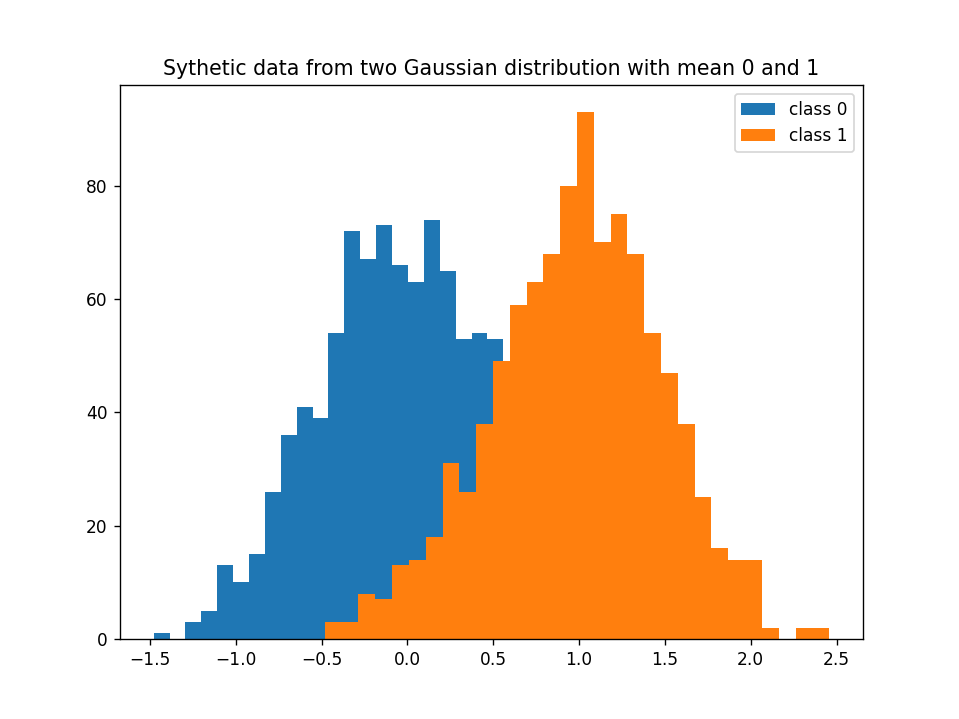

In [3]:
plt.hist(x1, bins=30, label='class 0')
plt.hist(x2, bins=30, label='class 1')
plt.title('Sythetic data from two Gaussian distribution with mean 0 and 1')
plt.legend();

## Nearest neighbor classifier in dimension 1

In [4]:
k = 30
neigh = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)

neigh.fit(X_train, y_train)
y_test_pred = neigh.predict(X_test)
f'accuracy = {(y_test_pred == y_test).mean()*100:.3f} %'

'accuracy = 83.700 %'

## Logistic regression in dimension 1

In [5]:
lr = LogisticRegression(penalty='none')
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
f'accuracy = {(y_test_pred == y_test).mean()*100:.3f} %'

'accuracy = 83.700 %'

In [6]:
sigma = np.std(X_train)
sigma

0.7035643202423523

## Add noise in other dimensions

Example in dimension 3

<IPython.core.display.Javascript object>


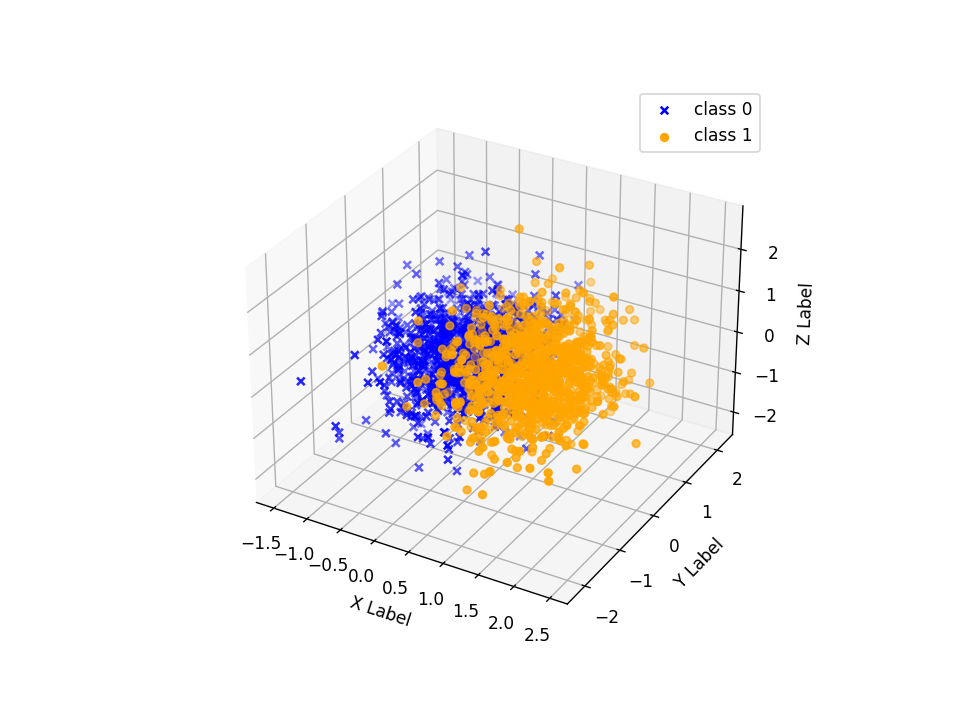

In [7]:
X_train_3d = np.concatenate([X_train, sigma*np.random.randn(X_train.shape[0], 2)], axis=1)
x1, y1, z1 = X_train_3d[:1000,0],  X_train_3d[:1000,1],  X_train_3d[:1000,2]
x2, y2, z2 = X_train_3d[1000:,0],  X_train_3d[1000:,1],  X_train_3d[1000:,2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, y1, z1, marker='x', color='blue', label='class 0')
ax.scatter(x2, y2, z2, marker='o', color='orange', label='class 1')
plt.legend()

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label');

## In higher dimensions

<IPython.core.display.Javascript object>


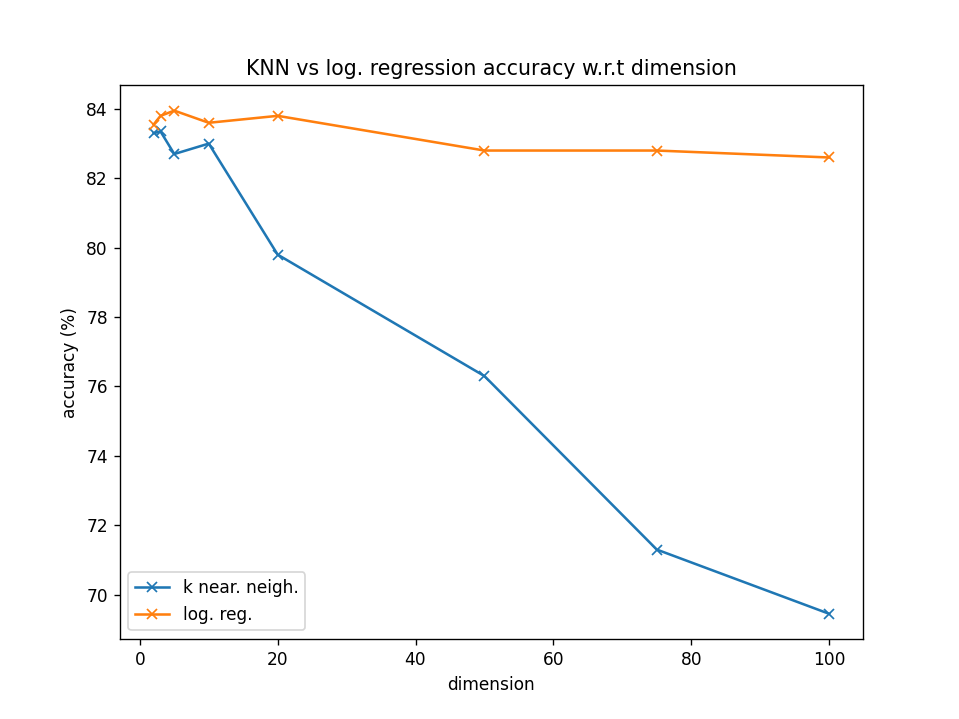

In [11]:
knn_acc, lr_acc = [], []
dims = [2, 3, 5, 10,  20, 50,  75, 100]
for d in dims:
    X_train_d = np.concatenate([X_train, sigma*np.random.randn(X_train.shape[0], d-1)], axis=1)
    X_test_d = np.concatenate([X_test, sigma*np.random.randn(X_train.shape[0], d-1)], axis=1)
    k = 30
    neigh = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)

    neigh.fit(X_train_d, y_train)
    y_test_pred = neigh.predict(X_test_d)
    knn_acc.append((y_test_pred == y_test).mean()*100)
    lr = LogisticRegression(penalty='none')
    lr.fit(X_train_d, y_train)
    y_test_pred = lr.predict(X_test_d)
    lr_acc.append((y_test_pred == y_test).mean()*100)
    
plt.figure()
plt.title('KNN vs log. regression accuracy w.r.t dimension')
plt.plot(dims, knn_acc, label='k near. neigh.', marker='x')
plt.plot(dims, lr_acc, label='log. reg.', marker='x')
plt.legend()
plt.ylabel('accuracy (%)')
plt.xlabel('dimension');

## K nearest neighbors for image classification

In [5]:
import pickle
import numpy as np
import os
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [6]:
data_dir = './cifar-10-batches-py'
if not os.path.exists(data_dir):
    print('You need to Download CIFAR 10 at the url "http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"  and to extract it')
    exit()

test_filename = os.path.join(data_dir, 'test_batch')

train_batch_filenames = [os.path.join(data_dir, f'data_batch_{i}') for i in range(1, 6)]

X_train, y_train = [], []
for train_batch_filename in train_batch_filenames:
    with open(train_batch_filename, 'rb') as fo:
        train_data = pickle.load(fo, encoding='bytes')
    X_train.append(train_data[b'data'])
    y_train.append(train_data[b'labels'])

X_train, y_train = np.concatenate(X_train), np.concatenate(y_train)
X_train = X_train.astype('float32') / 255.0

order = np.argsort(y_train)
X_train = X_train[order]
y_train = y_train[order]

n_per_class = 500
X_train = np.concatenate([X_train[i*5000:i*5000+n_per_class] for i in range(10)])
y_train = np.concatenate([y_train[i*5000:i*5000+n_per_class] for i in range(10)])
print('train', X_train.shape, y_train.shape)



with open(test_filename, 'rb') as fo:
    test_data = pickle.load(fo, encoding='bytes')
X_test = test_data[b'data']
y_test = test_data[b'labels']
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = X_test.astype('float32') / 255.0
print(X_test.shape, y_test.shape)

train (5000, 3072) (5000,)
(10000, 3072) (10000,)


## Explore the data

Which classes are encoded in this dataset ?

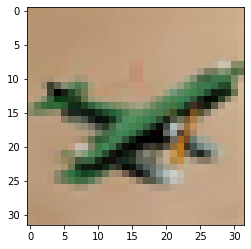

In [11]:
plt.imshow(X_train[1].reshape((3, 32, 32)).transpose((1,2,0)));

Nearest neighbor classifier.

In [12]:
k = 10

neigh = KNeighborsClassifier(n_neighbors=k, n_jobs=-1, weights='distance')
neigh.fit(X_train, y_train)
y_test_pred = neigh.predict(X_test)
acc = (y_test_pred == y_test).mean()

print(f'k={k}, l2 metric accuracy: {100*acc:.2f} %')


k=10, l2 metric accuracy: 29.13 %


Change the metric used